In [55]:
from matrices import *
from draw2d import *
from draw3d import *
B = (
(0, 2, 1),
(0, 1, 0),
(1, 0, -1)
)

v = (3, -2, 5)

In [2]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [3]:
multiply_matrix_vector(B, v)

(1, -2, -2)

In [4]:
A = ((1, 1, 0),
    (1, 0, 1),
    (1, -1, 1))

In [5]:
def matrix_multiply(A, B):
    return tuple(
        tuple(dot(row, col) for col in zip(*B))
        for row in A
    )

In [6]:
A = ((1, 1, 0), (1, 0, 1), (1, -1, 1))
B = ((0, 2, 1), (0, 1, 0), (1, 0, -1))
matrix_multiply(A, B)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [7]:
C = ((1, 2),
     (3, 4))
D = ((0, -1),
     (1, 0))
matrix_multiply(C, D)

((2, -1), (4, -3))

In [8]:
from teapot import load_triangles
from draw_model import draw_model
from math import *

def get_rotation_matrix(t):
    seconds = t / 1000
    return(
        (cos(seconds), 0, -sin(seconds)),
        (0, 1, 0),
        (sin(seconds), 0, cos(seconds))
    )
draw_model(load_triangles(), get_matrix=get_rotation_matrix)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'quit' is not defined

## Write a function infer_matrix(n, transformation) that takes in a dimension (like 2 or 3) and a function which is a vector tranformation assumed to be linear. It should be return an n-by-n square matrix an n-tuples of numbers which is the matrix representing the linear transformation.

In [9]:
def infer_matrix(n, transformation):
    def standard_basis_vectors(i):
        return (1 if i == j else 0 for j in range(1, n + 1))
    standard_basis = [standard_basis_vectors(i) for i in range(1, n +1 )]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

In [10]:
from transforms import *

infer_matrix(3, rotate_x_by(pi / 2))

((1, 0, 0),
 (0.0, 6.123233995736766e-17, -1.0),
 (0.0, 1.0, 1.2246467991473532e-16))

In [11]:
infer_matrix(3, identity)

((1, 0, 0), (0, 1, 0), (0, 0, 1))

## what is the result of the following product of 2-by-2 matrix with a 2D vector?

[1.3 -0.7;6.5 3.2] * [-2.5;0.3]

In [15]:
A = ((1.3, -0.7),
    (6.5, 3.2))
x = ((-2.5, ), (0.3, ))
matrix_multiply(A, x)

((-3.46,), (-15.29,))

## Write a random_matrix function that generates matrices of a specified size with random whole-number entries. Use it to generate five pairs of 3-by-3 matrices. 

In [19]:
def random_matrix(rows, cols, min = -2, max = 2):
    return tuple(tuple(randint(min, max) for _ in range(cols))
                for _ in range(rows))

In [21]:
A1 = random_matrix(3, 3, 0, 10)
A2 = random_matrix(3, 3, 0, 10)
A3 = random_matrix(3, 3, 0, 10)
A4 = random_matrix(3, 3, 0, 10)
A5 = random_matrix(3, 3, 0, 10)

## For each of your pairs of matrices from the previous exercise, try multiplying them in the opposite order.

In [22]:
matrix_multiply(A1, A2)

((102, 90, 98), (53, 44, 55), (69, 63, 78))

In [23]:
matrix_multiply(A2, A1)

((124, 116, 87), (64, 58, 47), (47, 52, 42))

## Apply the matrix ((2, 1, 1), (1, 2, 1), (1, 1, 2)) to all the vectors defining the teapot. What happens to the teapot and why?

In [24]:
def transform(v):
    m = ((2, 1, 1), (1, 2, 1), (1, 1, 2))
    return multiply_matrix_vector(m, v)
draw_model(polygon_map(transform, load_triangles()))

NameError: name 'quit' is not defined

## Given two matrices write a function compose_a_b that exectutes the composition of the linear transformation for b

In [27]:
a = ((1, 1, 0), (1, 0, 1), (1, -1, 1))
b = ((0, 2, 1), (0, 1, 0), (1, 0, -1))
def compose_A_B(A, B):
    return matrix_multiply(A, B)
compose_A_B(a, b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

## Find two 2-by-2 matrices, neither of which is the identity matrix I2, but whose product is the identity  matrix

In [28]:
a = ((-1, 0), (0, 1))
b = ((-1, 0), (0, 1))
matrix_multiply(a, b)

((1, 0), (0, 1))

## Write a matrix_power(power, matrix) function that raises a matrix to the specified power

In [36]:
def matrix_power(power, matrix):
    result = matrix
    for _ in range(1, power):
        result = matrix_multiply(result, matrix)
    return result

In [41]:
a = ((1, 0, 0), (0, 2, 0), (0, 0, 3))
matrix_power(2, a)

((1, 0, 0), (0, 4, 0), (0, 0, 9))

In [43]:
c = ((-1, -1, 0), (-2, 1, 2), (1, 0, -1))
d = ((1, ), (1, ), (1, ))
matrix_multiply(c, d)

((-2,), (1,), (0,))

## What are the dimensions of this matrix?

[1 2 3 4 5;6 7 8 9 10;11 12 13 14 15];

3x5

## What are the dimensions of a 2D column vector considered as a matrix? What about a 2D row vector? A 3D column vector? A 3D row vector?

2x1
1x2
3x1
1x3

## Write a function that turns a column vector into a row vector, or vice versa. Flipping a matrix on its side like this is called a transposition

In [46]:
def transpose(matrix):
    return tuple(*zip(matrix))

## Projection onto the y,z-plane and onto the x,z plane are also linear maps from 3D to 2D. What are their matrices?

In [48]:
a = ((0, 1, 0), 
    (0, 0, 1))
b = ((1, 0, 0), (0, 0, 1))

## Show by example that the infer_matrix function from a previous exercise can create matrices for linear functions whose inputs and outputs have different dimensions

In [50]:
def project_xy(v):
    x, y, z = v
    return (x, y)
infer_matrix(3, project_xy)

((1, 0, 0), (0, 1, 0))

## Write a 4x5 matrix which acts on a 5-dimensional vector by deleting the third of its five entries, thereby producing a 4-dimensional vector.

In [53]:
A = ((1, 0, 0, 0, 0), 
    (0, 1, 0, 0, 0),
    (0, 0, 0, 1, 0),
    (0, 0, 0, 0, 1))
v = ((1, ), (2, ), (3, ), (4, ), (5, ))
matrix_multiply(A, v)

((1,), (2,), (4,), (5,))

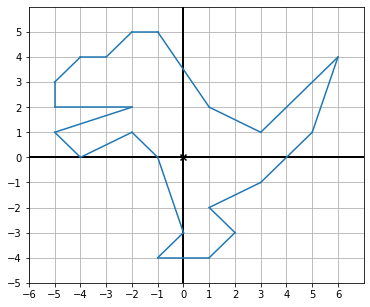

In [62]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
(-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
(-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

draw2d(Polygon2D(*dino_vectors))

In [ ]:
dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors]

draw3d()